In [35]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [36]:
df = pd.read_csv('/content/rappi_challenge_clean.csv')

In [37]:
df.head()

,Unnamed: 0,transaction_id,user_id,genero,linea_tc,interes_tc,monto,fecha,hora,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,anio,marca,proveedor
0,0,1,573,M,87000,56,581.03,02/01/20,0,Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel
1,1,2,737,F,34000,51,421.73,02/01/20,0,Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False,2021,Huawei,ATT
2,2,3,887,F,52000,38,399.55,02/01/20,0,Farmacia,Tijuana,En proceso,False,0.0,11.99,False,2017,Apple,ATT
3,3,4,1304,M,67000,60,828.01,02/01/20,0,Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False,2019,Samsung,ATT
4,4,5,1361,F,28000,52,886.04,02/01/20,0,Supermercado,Cancún,Aceptada,False,0.0,26.58,False,2021,Samsung,Telcel


In [38]:
df = df.drop(['Unnamed: 0'], axis=1)

In [39]:
df2 = df.copy()

In [40]:
df2.head()

,transaction_id,user_id,genero,linea_tc,interes_tc,monto,fecha,hora,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,anio,marca,proveedor
0,1,573,M,87000,56,581.03,02/01/20,0,Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel
1,2,737,F,34000,51,421.73,02/01/20,0,Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False,2021,Huawei,ATT
2,3,887,F,52000,38,399.55,02/01/20,0,Farmacia,Tijuana,En proceso,False,0.0,11.99,False,2017,Apple,ATT
3,4,1304,M,67000,60,828.01,02/01/20,0,Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False,2019,Samsung,ATT
4,5,1361,F,28000,52,886.04,02/01/20,0,Supermercado,Cancún,Aceptada,False,0.0,26.58,False,2021,Samsung,Telcel


In [41]:
not_fraud_count, fraud_count = np.bincount(df2["fraude"])
not_fraud_count, fraud_count

(25837, 804)

In [42]:
total_count = not_fraud_count + fraud_count
print(
    (
        f"Data:\n"
        f"    Total: {total_count}\n"
        f"    Fraud: {fraud_count} ({100 * fraud_count / total_count:.2f}% of total)\n"
    )
)

Data:
    Total: 26641
    Fraud: 804 (3.02% of total)



In [43]:
df2['is_weekend'] = False
for i in range(len(df2)):
  if df2['fecha'].iloc[i] in ('03/01/20','04/01/20', '05/01/20', '10/01/20','11/01/20', '12/01/20', '17/01/20','18/01/20', '19/01/20', '24/01/20','25/01/20', '26/01/20'):
    df2['is_weekend'] = True

In [44]:
df2["is_night"] = (df2["hora"] <= 6) & (df2["hora"] >= 21)

In [45]:
df2['fecha'] = pd.to_datetime(df2['fecha'], format='%d/%m/%y')

In [46]:
df2['customer_transactions_per_day'] = df2.groupby(['user_id', 'fecha'])['transaction_id'].transform('count')

In [47]:
df2.head()

,transaction_id,user_id,genero,linea_tc,interes_tc,monto,fecha,hora,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,anio,marca,proveedor,is_weekend,is_night,customer_transactions_per_day
0,1,573,M,87000,56,581.03,2020-01-02,0,Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel,True,False,1
1,2,737,F,34000,51,421.73,2020-01-02,0,Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False,2021,Huawei,ATT,True,False,1
2,3,887,F,52000,38,399.55,2020-01-02,0,Farmacia,Tijuana,En proceso,False,0.0,11.99,False,2017,Apple,ATT,True,False,1
3,4,1304,M,67000,60,828.01,2020-01-02,0,Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False,2019,Samsung,ATT,True,False,2
4,5,1361,F,28000,52,886.04,2020-01-02,0,Supermercado,Cancún,Aceptada,False,0.0,26.58,False,2021,Samsung,Telcel,True,False,2


In [48]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [49]:
df2.head()

,transaction_id,user_id,genero,linea_tc,interes_tc,monto,fecha,hora,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,anio,marca,proveedor,is_weekend,is_night,customer_transactions_per_day
0,1,573,M,87000,56,581.03,2020-01-02,0,Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel,True,False,1
1,2,737,F,34000,51,421.73,2020-01-02,0,Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False,2021,Huawei,ATT,True,False,1
2,3,887,F,52000,38,399.55,2020-01-02,0,Farmacia,Tijuana,En proceso,False,0.0,11.99,False,2017,Apple,ATT,True,False,1
3,4,1304,M,67000,60,828.01,2020-01-02,0,Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False,2019,Samsung,ATT,True,False,2
4,5,1361,F,28000,52,886.04,2020-01-02,0,Supermercado,Cancún,Aceptada,False,0.0,26.58,False,2021,Samsung,Telcel,True,False,2


In [50]:
df2.dtypes

transaction_id                            int64
user_id                                   int64
genero                                   object
linea_tc                                  int64
interes_tc                                int64
monto                                   float64
fecha                            datetime64[ns]
hora                                      int64
establecimiento                          object
ciudad                                   object
status_txn                               object
is_prime                                   bool
dcto                                    float64
cashback                                float64
fraude                                     bool
anio                                      int64
marca                                    object
proveedor                                object
is_weekend                                 bool
is_night                                   bool
customer_transactions_per_day           

In [51]:
df3 = df2.copy()

In [52]:
df3 = df3.drop(['transaction_id', 'user_id', 'fecha', 'dcto', 'cashback', 'anio'], axis=1)

In [53]:
new_data = df3[['genero', 'establecimiento', 'ciudad', 'status_txn', 'marca', 'proveedor']]
for col in new_data.columns:
  new_data = pd.get_dummies(new_data, columns=[col], prefix=[col], drop_first=True)

In [54]:
df3 = df3.drop(['genero', 'establecimiento', 'ciudad', 'status_txn', 'marca', 'proveedor'],axis=1)

In [55]:
df3 = pd.concat([df3, new_data], axis=1)

In [56]:
df3.head()

,linea_tc,interes_tc,monto,hora,is_prime,fraude,is_weekend,is_night,customer_transactions_per_day,genero_M,genero_N,establecimiento_Compra en línea,establecimiento_Farmacia,establecimiento_Supermercado,establecimiento_Tienda departamental,establecimiento_Unknown,ciudad_Ciudad de México,ciudad_Guadalajara,ciudad_Monterrey,ciudad_Nezahualcóyotl,ciudad_Tijuana,ciudad_Toluca,status_txn_En proceso,status_txn_Rechazada,marca_Huawei,marca_Motorola,marca_Samsung,proveedor_Movistar,proveedor_Telcel
0,87000,56,581.03,0,False,False,True,False,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,34000,51,421.73,0,False,False,True,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,52000,38,399.55,0,False,False,True,False,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,67000,60,828.01,0,False,False,True,False,2,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,28000,52,886.04,0,False,False,True,False,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [57]:
#split dataset into features and label
X= df3.drop(labels='fraude',axis=1)
y= df3['fraude']

In [58]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_ros, y_ros = ros.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({False: 25837, True: 804})
Resample dataset shape Counter({False: 25837, True: 25837})


In [59]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros, test_size=0.2, random_state=0)

In [60]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [190]:
# #create param
# model_param = {
#     'RandomForestClassifier':{
#         'model':RandomForestClassifier(),
#         'param':{
#             'n_estimators': [10, 50, 100, 130], 
#             'criterion': ['gini', 'entropy'],
#             'max_depth': range(2, 4, 1), 
#             'max_features': ['auto', 'log2']
#         }
#     },
#     'XGBClassifier':{
#         'model':XGBClassifier(objective='binary:logistic'),
#         'param':{
#            'learning_rate': [0.5, 0.1, 0.01, 0.001],
#             'max_depth': [3, 5, 10, 20],
#             'n_estimators': [10, 50, 100, 200]
#         }
#     }
# }

In [191]:
# scores =[]
# for model_name, mp in model_param.items():
#     model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
#     model_selection.fit(X_ros,y_ros)
#     scores.append({
#         'model': model_name,
#         'best_score': model_selection.best_score_,
#         'best_params': model_selection.best_params_
#     })

In [61]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators=200)

In [62]:
model_xgb.fit(X_train,y_train)

XGBClassifier(max_depth=20, n_estimators=200)

In [63]:
model_xgb.score(X_test,y_test)

0.9972907595549105

In [73]:
model_xgb.predict(X_test[:1])

array([ True])

In [65]:
X_test[:1]

,linea_tc,interes_tc,monto,hora,is_prime,is_weekend,is_night,customer_transactions_per_day,genero_M,genero_N,establecimiento_Compra en línea,establecimiento_Farmacia,establecimiento_Supermercado,establecimiento_Tienda departamental,establecimiento_Unknown,ciudad_Ciudad de México,ciudad_Guadalajara,ciudad_Monterrey,ciudad_Nezahualcóyotl,ciudad_Tijuana,ciudad_Toluca,status_txn_En proceso,status_txn_Rechazada,marca_Huawei,marca_Motorola,marca_Samsung,proveedor_Movistar,proveedor_Telcel
49577,87000,61,669.38,8,False,True,False,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [70]:
X_test[:1]

,linea_tc,interes_tc,monto,hora,is_prime,is_weekend,is_night,customer_transactions_per_day,genero_M,genero_N,establecimiento_Compra en línea,establecimiento_Farmacia,establecimiento_Supermercado,establecimiento_Tienda departamental,establecimiento_Unknown,ciudad_Ciudad de México,ciudad_Guadalajara,ciudad_Monterrey,ciudad_Nezahualcóyotl,ciudad_Tijuana,ciudad_Toluca,status_txn_En proceso,status_txn_Rechazada,marca_Huawei,marca_Motorola,marca_Samsung,proveedor_Movistar,proveedor_Telcel
49577,87000,61,669.38,8,False,True,False,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [68]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[5060,   28],
       [   0, 5247]])

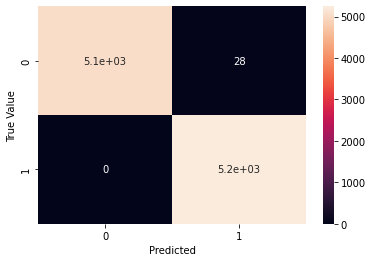

In [69]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

# Pickle the model file for deployment


In [74]:
import pickle

In [ ]:
pickle.dump(model_xgb, open('xgmodel.pkl', 'wb'))